## Maxwell-Boltzmann distribution

In thermodynamics, it's useful to build intuition at both the microscopic and macroscopic levels.  Chapter 17 took a big-picture approach to the ideal gas, describing it in terms of several familiar "state variables": temperature, pressure, and volume.

Chapter 18 looks at the ideal gas on the molecular level, and starts by showing that the average kinetic energy of each gas molecule is proportional to the temperature:

$\overline{K} = \frac{1}{2}m \overline{v^2} = \frac{3}{2}kT$

Higher temperature means faster moving molecules (on average).  

The [average number of people per family in the US](https://www.statista.com/statistics/183657/average-size-of-a-family-in-the-us/) has been about 3.14 the past few years.  I haven't seen many families with 3.14 people, but 2, 3 or 4 seems pretty common.  Anyways, it's the same case with these gas molecules--they don't all have the same kinetic energy, and they aren't all moving at the same speed.  

It's convenient to describe their speeds using a probability distribution--a function that tells you how likely it is to find a gas molecule moving at a particular speed.  And that's what the Maxwell-Boltzmann distribution does for us:

$p(v) = 4\pi \big(\frac{m}{2 \pi k T}\big)^{\frac{3}{2}} v^2 e^{-\frac{mv^2}{2kT}}$

Just to be clear, the probability of a molecule moving at some exact speed (like $v = 210.326984... $m/s) is 0.  You need to consider some range of velocities, $dv$, and then $p(v)*dv$ gives you the probability of a molecule having a speed in this range.  (If you prefer, it's the area under the curve of this function that gives you probabilities.)

Equation (18-6) in the book uses $f(v) = N p(v)$ as the Maxwell distribution.  It's the same thing, except for this factor of $N$--the number of gas molecules.  Instead of probabilities, $f(v) dv$ gives you the number of molecules in the velocity range $dv$.  

The cell below contains some Python code to plot the Maxwell-Boltzmann distribution.  You can click on the cell and then click the "Run" button up above (or press "shift+enter").  There are some temperature and mass sliders; adjust those and see how it changes the shape of the distribution.  The units are : temperature (T) in Kelvin, and the mass of each molecule (m) in amu.

<IPython.core.display.Javascript object>


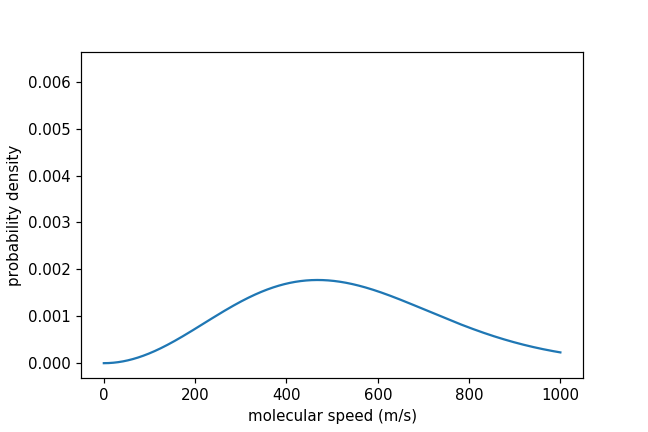

interactive(children=(FloatSlider(value=1.0, description='T', max=300.0, min=0.1), IntSlider(value=1, descript…

In [34]:
from ipywidgets import *
import scipy.optimize
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

k = 1.38e-23  #Boltzmann constant in kg m^2 / (s^2 K)

def mb_dist(v,T,m):
    m = 1.6e-27*m  # convert amu to kg
    return 4*np.pi*(m/(2*np.pi*k*T))**1.5*np.exp(-m*v**2/(2*k*T))*v**2

x = np.linspace(0, 1000, int(1e4))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("molecular speed (m/s)")
plt.ylabel("probability density")
line, = ax.plot(x, mb_dist(x, T = 1, m = 1))

def update(T = 1.0, m = 1.0):
    line.set_ydata(mb_dist(x, T, m))
    fig.canvas.draw_idle()

interact(update, T = (0.1,300,0.1), m = (1, 50, 1));